# <div dir="rtl">سوال چهارم:</div>

# <div dir="rtl">قسمت a:</div>

<div dir="rtl">

در این سوال خواسته شده است که تاثیر داده‌های imbalance را بررسی کنیم.

فرض کنید با مسئله دسته بندی روبرو هستیم. در کلاس اول 80 داده و در کلاس دوم 20 داده داریم یعنی نسبت کلاس‌ها بصورت 4:1 است. در این زمان میگوییم هنگام آموزش مدل بصورت بایاس شده عمل میکند و در زمان مواجه شدن با داده هایی که قبلا ندیده است بصورت مناسبی رفتار نخواهد کرد. 

فرض کنید مدل بسیار ساده باشد و همه ی داده ها را به کلاس اول نسبت دهد. در این صورت در زمان آموزش به صحت 80 درصد میرسیم. برای دیگر مدلهایی که روی این داده ها آموزش میبینند نیز شرایطی مشابه پیش می‌آید و مدل آموزش دیده شده هنگام کار روی داده‌های تست عملکرد خوبی نخواهد داشت.

<div>

In [1]:
%cd drive/MyDrive/FDM

/content/drive/MyDrive/FDM


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.utils import resample,shuffle

In [3]:
machine_data = pd.read_csv("machines.csv", index_col=None, header=None).drop(0, axis=1)
machine_data = machine_data.rename(columns={1: '‫‪Vendor_name', 2: 'model', 3: 'MCYT', 4: 'MMIN', 5: 'MMAX', 
                                            6: 'CACH', 7: 'CHMIN', 8: 'CHMAX', 9: 'PRP', 10: 'ERP'})

# <div dir="rtl">قسمت b:</div>

<div dir="rtl">

در این سوال خواسته شده است براساس مقدار ستون PRP داده ها را به دو دسته تقسیم کنیم.

اگر مقدار این ستون از 300 کمتر مساوی باشد در گروه A قرار گیرد و در غیر این صورت به گروه B.

این کار را در سلول زیر و با استفاده از تابع cut انجام داده ایم.

<div>

In [4]:
category = pd.cut(machine_data.PRP,bins=[0,300, 1151],labels=['A','B'])
machine_data.insert(machine_data.shape[1]-1,'labeled_PRP',category)

# <div dir="rtl">قسمت c:</div>

<div dir="rtl">

در این قسمت از ما خواسته شده مشخص کنیم ستون labeled_PRP بالانس است یا خیر.

من با استفاده از نمودار pie توزیع داده های این ستون را نمایش داده ام.

همانطور که قابل مشاهده است 17 درصد از داده ها متعلق به کلاس B هستند و 92 درصد از داده ها متعلق به کلاس A هستند یعنی نسبت بین این دو بیشتر از 4 به 1 است . شدیدا داده ها غیربالانس هستند.


<div>

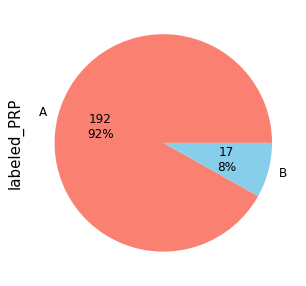

In [5]:
def label_function(val):
    return f'{val / 100 * len(machine_data):.0f}\n{val:.0f}%'

fig, (ax1) = plt.subplots(ncols=1, figsize=(10, 5))
machine_data.groupby('labeled_PRP').size().plot(kind='pie',  autopct=label_function, textprops={'fontsize': 12},
                                                colors=['salmon', 'skyblue'], ax=ax1)
ax1.set_ylabel('labeled_PRP', size=15)

plt.show()

# <div dir="rtl">قسمت d:</div>

<div dir="rtl">
در قسمت قبل نشان دادیم که داده ها غیر بالانس هستند الان به دنبال روشی هستیم که بتوانیم داده ها را بالانس کنیم.

از آنجایی که تعداد دادههای متعلق به گروه B برابر با 17 و بسیار کمتر از گروه دیگر است میخواهیم از تکنیک upSampling استفاده کنیم و داده ها را بالانس کنیم.

بدین منظور داده های دو گروه را از هم جدا میکنیم.

با داده های متعلق به گروه A کاری نداریم و قصد upSampling داده های گروه B را داریم.

داده های این گروه را به تابع resample از کتابخانه sklearn میدهیم و میگوییم با تکرار تصادفی این 17 سطر 192 سطر برای ما بسازد در حرالی که بعضی از سطرها چند بار تکرار میشوند.

نهایتا با اتصال داده های دو گروه به یک دیگر یک دیتاست بالانس نسبت به ویژگی PRP داریم.

در شکل زیر با استفاده از نمودار pie توزیع داده ها را نمایش داده ام و همانطور که مشخص است هر کلاس 50 درصد از داده ها را ساخته است.

<div>

In [6]:
df_A = machine_data[machine_data['labeled_PRP'] == 'A']
df_B = machine_data[machine_data['labeled_PRP'] == 'B']
df_A.shape, df_B.shape

((192, 11), (17, 11))

In [7]:
df_B_upsampled = resample(df_B,random_state=42,n_samples=192,replace=True)
df_B_upsampled.shape

(192, 11)

In [8]:
df_upSampled = pd.concat([df_A, df_B_upsampled])

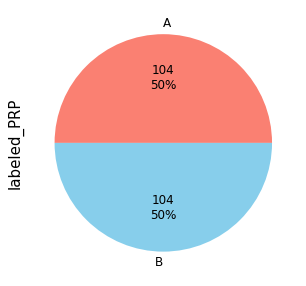

In [9]:
fig, (ax1) = plt.subplots(ncols=1, figsize=(10, 5))
df_upSampled.groupby('labeled_PRP').size().plot(kind='pie',  autopct=label_function, textprops={'fontsize': 12},
                                                colors=['salmon', 'skyblue'], ax=ax1)
ax1.set_ylabel('labeled_PRP', size=15)

plt.show()

# <div dir="rtl">قسمت d:</div>

<div dir="rtl">

اگر چه داده ها در این قسمت بالانس هستند اما برای استفاده از تکنیک downSampling این قسمت را انجام می‌دهیم.


ابتدا با استفاده از resample تعداد داده های گروه B را به 240 افزایش میدهیم در حالیکه تعداد داده های گره A همچنان 192 تا است. اکنون داده ها بصورت غیر بالانس درآمده اند.

در نمودار pie زیر توزیع داده های دو کلاس نمایش داده شده است که بصورت 44 درصد و 56 درصد می باشد.

سپس با استفاده از تابع sample از کتابخانه pandas 192 سطر از 240 سطر را بصورت تصادفی نمونه میگیریم تا از هر دو دسته به یک اندازه داده داشته باشیم.

نهایتا دو دسته هم اندازه را به هم متصل میکنیم.

در آخرین قدم توزیع یکنواخت کلاسها را با استفاده از تابع  pie نمایش میدهیم.

<div>

In [10]:
df_B_upsampled2 = resample(df_B,random_state=42,n_samples=240,replace=True)
df_B_upsampled2.shape

(240, 11)

In [11]:
machine_data_upsampled2 = pd.concat([df_A, df_B_upsampled2])

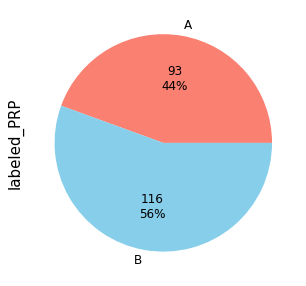

In [12]:
fig, (ax1) = plt.subplots(ncols=1, figsize=(10, 5))
machine_data_upsampled2.groupby('labeled_PRP').size().plot(kind='pie',  autopct=label_function, textprops={'fontsize': 12},
                                                colors=['salmon', 'skyblue'], ax=ax1)
ax1.set_ylabel('labeled_PRP', size=15)

plt.show()

In [13]:
df_B_upsampled2_downsamped = df_B_upsampled2.sample(n=192, replace=False, random_state=42)
df_downSampled = pd.concat([df_A, df_B_upsampled2_downsamped])

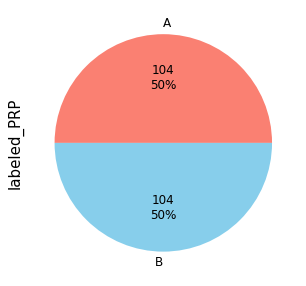

In [14]:
fig, (ax1) = plt.subplots(ncols=1, figsize=(10, 5))
df_downSampled.groupby('labeled_PRP').size().plot(kind='pie',  autopct=label_function, textprops={'fontsize': 12},
                                                colors=['salmon', 'skyblue'], ax=ax1)
ax1.set_ylabel('labeled_PRP', size=15)

plt.show()